In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import nbconvert

# Fundamentos del transporte de cantidad de movimiento
## Fluidos Newtonianos y no Newtonianos

Los fluidos **Newtonianos** son aquellos que se comportan de acuerdo con la ley de viscosidad de Newton
\begin{equation}
\tau = \mu \dot{\gamma}
\end{equation}

donde:

* $\tau$: Esfuerzo cortante.
* $\mu$: Viscosidad.
* $\dot{\gamma}$: razón de deformación $\left(\frac{du}{dy}\right)$.


## Modelos reológicos

Se utilizan para describir el comportamiento de fluidos **no Newtonianos**.

### Modelo de la ley de poder (Ostwald-de Waele)

Esta descrito por la ecuación:
\begin{equation}
\tau = k\dot{\gamma}^{n}
\end{equation}

donde:

* $k$: índice de consistencia (depende del material)
* $n$: índice de comportamiento de flujo ($n < 1$ para **pseudoplásticos**, $n > 1$ para **dilatantes**).

### Modelo de plástico de Bingham

Está descrito por la ecuación
\begin{equation}
\tau = \tau_{0} + \mu_{p}\dot{\gamma}
\end{equation}

donde $\tau_{0}$ es el esfuerzo de cedencia.

### Modelo de Herschel-Bulkley (Ley de poder generalizada)

Está descrito por la ecuación:
\begin{equation}
\tau = \tau_{0} + k\dot{\gamma}^{n}
\end{equation}

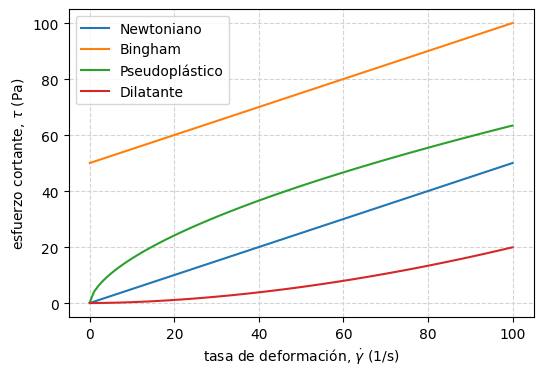

In [5]:
fig, ax = plt.subplots(figsize=(6,4))

# Definimos el rango de deformación (de 0 a 100)
tasa_deformacion = np.linspace(0.01, 100, 100)

# Constantes para cada modelo
mu = 0.5 # Viscosidad Newtoniana (Pa.s)
tau_0 = 50 # Esfuerzo de cedencia Bingham (Pa)
mu_B = 0.5 # Viscosidad plástico de Bingham (Pa.s)
K_ps = 4 # Índice de consistencia de pseudoplástico
n_ps = 0.6 # Índice de comportamiendo fluido de pseudoplástico
K_dl = 0.005 # Índice de consistencia de dilatante
n_dl = 1.8 # Índice de comportamiendo fluido de dilatante

# Calcular el esfuerzo cortante para cada modelo de fluido
ec_newton = mu * tasa_deformacion
ec_bingham = tau_0 + mu_B * tasa_deformacion
ec_ps = K_ps * tasa_deformacion**n_ps
ec_dl = K_dl * tasa_deformacion**n_dl

# Graficar los resultados
ax.plot(tasa_deformacion, ec_newton, label = 'Newtoniano')
ax.plot(tasa_deformacion, ec_bingham, label = 'Bingham')
ax.plot(tasa_deformacion, ec_ps, label = 'Pseudoplástico')
ax.plot(tasa_deformacion, ec_dl, label = 'Dilatante')


ax.set_xlabel(r'tasa de deformación, $\dot{\gamma}$ (1/s)')
ax.set_ylabel(r'esfuerzo cortante, $\tau$ (Pa)')
ax.grid(ls='--', color='lightgray')
ax.legend()

plt.show()

## Estimación de viscosidad en líquidos y gases

Para líquidos existen diversas correlaciones empíricas que han sido resultado de numerosos estudios experimentales. 

### Ecuación de Andrade
La ecuación de Andrade se utiliza para líquidos simples y está descrita por la siguiente ecuación:
\begin{equation}
\mu = Ae^{B/T}
\end{equation}

Donde:

* $A,~B$: Constantes empíricas.
* $T$: Temperatura.


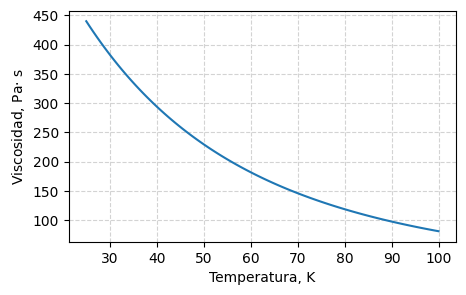

In [3]:
fig, ax = plt.subplots(figsize=(5,3))

# Definimos el rango de temperatura (de 25 a 100)
temp = np.linspace(25, 100, 100)

# Constantes para la ecuacion
A = 0.1 # Pa.s
B = 2500 # J/mol
T = temp + 273

# Calcular la viscosidad
mu = A*np.exp(B/T)

# Graficar los resultados
ax.plot(temp, mu)
ax.set_xlabel("Temperatura, K")
ax.set_ylabel(rf"Viscosidad, Pa$\cdot$ s")
ax.grid(ls='--', color='lightgray')
#ax.legend()

plt.show()

### Ecuación de Blasius
La ecuación de Blasius se utiliza para determinar la viscosidad de acuerdo con el régimen turbulento:

\begin{equation}
\mu = \frac{0.079}{Re^{0.25}}
\end{equation}

### Ecuación de Sutherland
Ésta aproximación se utiliza para calcular la viscosidad de gases mediante la ecuación siguiente:

\begin{equation}
\mu = \mu_0 \frac{(T/T_0)^{3/2}(T_0 + S)}{(T+S)}
\end{equation}

donde:

* $\mu_0,~T_0$: Viscosidad y temperatura de referencia.
* $S$: Constante de Sutherland (depende del gas).

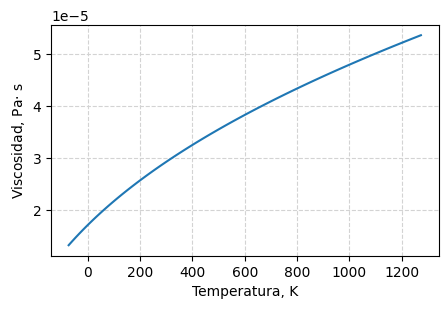

In [4]:
fig, ax = plt.subplots(figsize=(5,3))

# Definimos el rango de temperatura (de 25 a 100)
temp = np.linspace(-73, 1273, 100)

# Constantes y puntos de referencia para la ecuacion
mu_0 = 1.716E-05 # Pa.s a 273K
S = 110.4
T_0 = 273
T = temp + 273

# Calcular la viscosidad
mu = mu_0 * (T / T_0)**(3/2) * ((T_0 + S) / (T + S))

# Graficar los resultados
ax.plot(temp, mu)
ax.set_xlabel("Temperatura, K")
ax.set_ylabel(rf"Viscosidad, Pa$\cdot$ s")
ax.grid(ls='--', color='lightgray')
#ax.legend()

plt.show()